<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Importing-Files" data-toc-modified-id="Importing-Files-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing Files</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li></ul></div>

<a id='Import_Packages'></a>
# Import Packages

In [68]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import math

<a id='Data_Wrangling'></a>
# Data Wrangling

<a id='Importing_Files'></a>
## Importing Files

In [69]:
# Import the file: walmart_features
features_file_path = r'walmart_data\walmart_features.csv'
features_df = pd.read_csv(features_file_path, parse_dates=['Date'])

In [70]:
# Import the file: walmart_stores
stores_file_path = r'walmart_data\walmart_stores.csv'
stores_df = pd.read_csv(stores_file_path)

In [71]:
# Import the file: walmart_data
data_file_path = r'walmart_data\walmart_train.csv'
data_df = file = pd.read_csv(data_file_path, parse_dates=['Date'])

In [72]:
# Let's start by inner joining the stores dataset onto data dataset
merged_data = data_df.merge(stores_df)

# Looks like nothing was lost, the same amount of observations remain and the features increased by the correct amount
merged_data = merged_data.merge(features_df)

# Find columns which have any null values
null_columns = merged_data.columns[merged_data.isna().any()].tolist()

# Impute the null columns with 0s and convert them to ints
for column in null_columns:
    merged_data[column].fillna(value=0, inplace=True)
for column in null_columns:
    merged_data[column] = merged_data[column].astype(int)

# Looks like Store and Department are int, let's change them to category
merged_data['Store'] = merged_data['Store'].astype('category')
merged_data['Dept'] = merged_data['Dept'].astype('category')

# Type should be of dtype category, let's change it now
merged_data['Type'] = merged_data['Type'].astype('category')

df = merged_data

# EDA

In [73]:
def save_and_show_plot(filename, format=None):
    """Save a matplotlib plot with the given filename and format, then show the plot"""
    
    fig = plt.gcf()
    
    filepath = 'Visualizations/' + filename.replace(' ','_')
    fig.savefig(filepath, format=format, bbox_inches='tight', transparent=True)
    
    plt.show()

In [74]:
plt.rcParams['axes.grid'] = True
plt.rcParams['savefig.transparent'] = True

In [75]:
# Define a function to generate a features correlations heatmap
def gen_corr_heatmap(dataframe, title, mask=True, annot=False, save=False):
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1)

    if mask == True:
        mask = np.zeros_like(dataframe.corr())
        mask[np.triu_indices_from(mask)] = True

    with sns.axes_style('white'):
        sns.heatmap(dataframe.corr(), vmin=-1, vmax=1,
                    mask=mask, center=0, annot=annot, cmap='bwr')

    plt.title(f'\n{title}\n', fontsize=18)

    if save:
        filepath = title + '.png'
        save_and_show_plot(filepath)

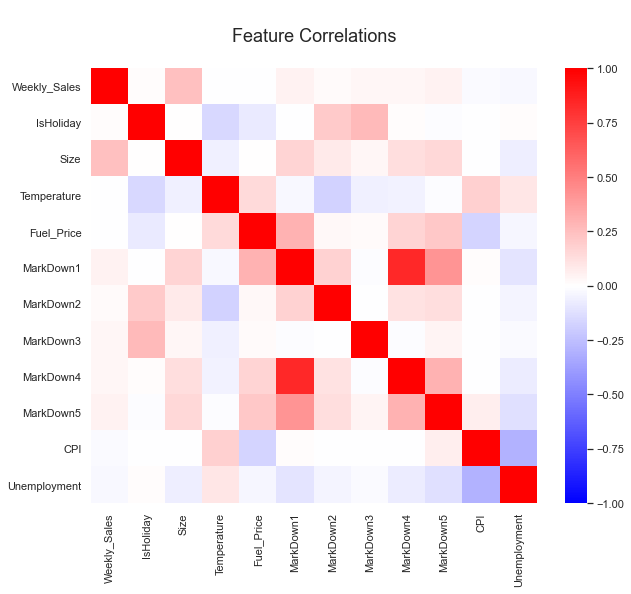

In [76]:
gen_corr_heatmap(df, title='Feature Correlations', mask=False, save=False)

In [77]:
# Define a function to generate a correlation heatmap between the target feature and other features
def gen_corr_to_target(dataframe, target, title, annot=False, save=None):
    plt.figure(figsize=(4, 6))
    sns.set(font_scale=1)

    sns.heatmap(dataframe.corr()[[target]].sort_values(target, ascending=False)[1:], vmin=-1, vmax=1,
                center=0, annot=annot, cmap='bwr')

    plt.title(f'\n{title}\n', fontsize=18)
        
    if save:
        filepath = title + '.png'
        save_and_show_plot(filepath)

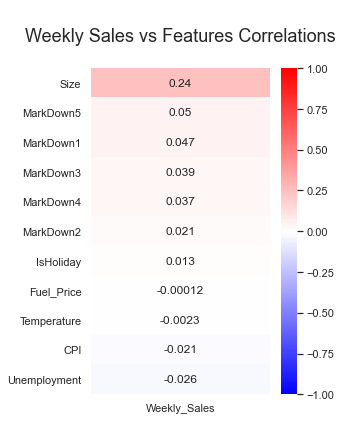

In [78]:
gen_corr_to_target(dataframe=df, target='Weekly_Sales', title='Weekly Sales vs Features Correlations', annot=True, save=False)

In [79]:
holidays_dict = {
    'Super_Bowl': ['12-Feb-10', '11-Feb-11', '10-Feb-12', '8-Feb-13'],
    'Labor_Day': ['10-Sep-10', '9-Sep-11', '7-Sep-12', '6-Sep-13'],
    'Thanksgiving': ['26-Nov-10', '25-Nov-11', '23-Nov-12', '29-Nov-13'],
    'Christmas': ['31-Dec-10', '30-Dec-11', '28-Dec-12', '27-Dec-13']
}

holidays_df = pd.DataFrame(holidays_dict, dtype='datetime64[ns]')
holidays_df

,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,2010-02-12,2010-09-10,2010-11-26,2010-12-31
1,2011-02-11,2011-09-09,2011-11-25,2011-12-30
2,2012-02-10,2012-09-07,2012-11-23,2012-12-28
3,2013-02-08,2013-09-06,2013-11-29,2013-12-27


In [80]:
# Create a DataFrame to visualize the year vs. Weekly_Sales vs. [time-period].
date_df = pd.DataFrame()
date_df['Weekly_Sales'] = df.Weekly_Sales
date_df['Year'] = df.Date.dt.isocalendar().year
date_df['Week'] = df.Date.dt.isocalendar().week
date_df['IsHoliday'] =df['IsHoliday']

In [81]:
date_df[date_df['IsHoliday'] == True]['Week'].unique()

<IntegerArray>
[6, 36, 47, 52]
Length: 4, dtype: UInt32

ValueError: x and y must be the same size

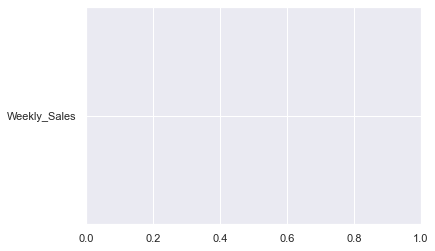

In [82]:
plt.scatter(x='Week', y='Weekly_Sales', data=mean_plot_data[mean_plot_data['IsHoliday'] == True], color='red')

In [ ]:
# Plot MEAN weekly sales vs. week per year
mean_plot_data = date_df.groupby(['Year', 'Week']).mean()
mean_plot_data = mean_plot_data.reset_index().rename(
    {'Weekly_Sales': 'Mean_Weekly_Sales'}, axis=1)

plt.figure(figsize=(15,8))
sns.lineplot(data=mean_plot_data, x='Week', y='Mean_Weekly_Sales', hue='Year', palette='tab10')
plt.axvline(x=6)
plt.axvline(x=36)
plt.axvline(x=47)
plt.axvline(x=52)

plt.show()

In [ ]:
# Plot MEDIAN weekly sales vs. week per year
median_plot_data = date_df.groupby(['Year', 'Week']).median()
median_plot_data = median_plot_data.reset_index().rename(
    {'Weekly_Sales': 'Median_Weekly_Sales'}, axis=1)

plt.figure(figsize=(15,8))
plot = sns.lineplot(data=median_plot_data, x='Week', y='Median_Weekly_Sales', hue='Year', palette='tab10')
plt.axvline(x=6)
plt.axvline(x=36)
plt.axvline(x=47)
plt.axvline(x=52)
plt.title('Median Weekly Sales with Holidays')

plot.figure.savefig('Median_Weekly_Sales_with_Holidays.png')
plt.show()